Analyzing the dataset

The NSL-KDD dataset includes different CSVs for the test data and the training data - KDDTrain and KDDTest

In [18]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("KDDTrain.csv") 
df.shape #tells us the number of rows and columns of the dataset

(125973, 42)

In [3]:
#viewing the first 10 entries of the dataset 
df.sample(10)

,duration,protocol_type,service,flag,src_bytesdst,bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
8323,0,tcp,http,SF,213,998,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
42062,0,tcp,http,SF,163,17431,0,0,0,0,...,255,1.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,normal
14757,0,icmp,eco_i,SF,8,0,0,0,0,0,...,48,1.00,0.00,1.00,0.52,0.00,0.00,0.00,0.00,anomaly
45808,0,tcp,http,S1,0,0,0,0,0,0,...,16,1.00,0.00,0.06,0.00,0.06,0.06,0.94,0.94,normal
44462,0,tcp,private,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
37028,0,tcp,http,SF,309,1425,0,0,0,0,...,255,1.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,normal
59396,0,tcp,http,S0,0,0,0,0,0,0,...,19,0.07,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
57074,0,tcp,http,SF,199,4729,0,0,0,0,...,255,1.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,normal
69321,0,tcp,http,SF,318,1068,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,normal
117197,0,tcp,http,SF,285,1045,0,0,0,0,...,255,1.00,0.00,0.25,0.04,0.25,0.00,0.00,0.00,normal


In [4]:
#shows the row counts and the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytesdst                 125973 non-null  int64  
 5   bytes                        125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
#shows the main statistics for every column in the dataset
df.describe()

,duration,src_bytesdst,bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#viewing the column names
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytesdst', 'bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_rerror_rate', 'rerror_rate',
       'srv_rerror_rate.1', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

Data Pre-processing

Step 1: Removing usesless characters 

In [7]:
#Finding any columns of datatype string
string_cols = df.select_dtypes(include='object').columns
print(df[string_cols])

       protocol_type   service flag    class
0                tcp  ftp_data   SF   normal
1                udp     other   SF   normal
2                tcp   private   S0  anomaly
3                tcp      http   SF   normal
4                tcp      http   SF   normal
...              ...       ...  ...      ...
125968           tcp   private   S0  anomaly
125969           udp   private   SF   normal
125970           tcp      smtp   SF   normal
125971           tcp    klogin   S0  anomaly
125972           tcp  ftp_data   SF   normal

[125973 rows x 4 columns]


As we can see from the above sample, for the columns with string datatype, the values do not have any useless characters and hence, these columns do not need to be changed.

Step 2: Removing columns with a high percentage of zero values

In [102]:
# Calculate percentage of 0 values for each column
zero_percents = (df == 0).sum(axis=0) / len(df) 
print(zero_percents)

duration                       0.920469
protocol_type                  0.000000
service                        0.000000
flag                           0.000000
src_bytesdst                   0.392112
bytes                          0.539503
wrong_fragment                 0.991347
hot                            0.978796
logged_in                      0.604236
num_compromised                0.989791
root_shell                     0.998658
num_root                       0.994848
num_file_creations             0.997722
num_access_files               0.997055
is_guest_login                 0.990577
count                          0.000103
srv_count                      0.000103
serror_rate                    0.689245
srv_rerror_rate                0.704527
rerror_rate                    0.871471
srv_rerror_rate.1              0.871344
same_srv_rate                  0.021959
diff_srv_rate                  0.604998
srv_diff_host_rate             0.774571
dst_host_count                 0.000024


In [103]:
#finding the columns with the highest percentage of zero values
highZeroPercents=zero_percents[zero_percents>0.9]
print(highZeroPercents)

duration              0.920469
wrong_fragment        0.991347
hot                   0.978796
num_compromised       0.989791
root_shell            0.998658
num_root              0.994848
num_file_creations    0.997722
num_access_files      0.997055
is_guest_login        0.990577
dtype: float64


In [104]:
#as we can see from the above output there are 7 columns which we can remove from the dataset
zero_threshold=0.9
#boolean mask to filter out the columns 
mask_cols=zero_percents<zero_threshold
df_filtered=df.loc[:,mask_cols]
df_filtered.sample(10)

,protocol_type,service,flag,src_bytesdst,bytes,logged_in,count,srv_count,serror_rate,srv_rerror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_num
104296,tcp,http,SF,194,770,1,14,14,0.0,0.0,...,1.00,0.00,0.07,0.04,0.00,0.00,0.00,0.00,normal,0
58486,tcp,http,SF,324,1227,1,4,4,0.0,0.0,...,1.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,normal,0
12850,tcp,http,SF,277,398,1,8,8,0.0,0.0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,normal,0
111267,tcp,private,S0,0,0,0,115,4,1.0,1.0,...,0.07,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
62782,tcp,private,S0,0,0,0,56,4,1.0,1.0,...,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
49421,tcp,http_443,S0,0,0,0,298,14,1.0,1.0,...,0.05,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
122041,tcp,http,SF,304,1380,1,3,3,0.0,0.0,...,0.88,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
86221,tcp,private,S0,0,0,0,136,6,1.0,1.0,...,0.03,0.08,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
34884,tcp,finger,S0,0,0,0,247,15,1.0,1.0,...,0.00,0.09,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
110241,tcp,telnet,SF,568,2478,1,1,1,0.0,0.0,...,0.25,0.12,0.02,0.00,0.02,0.08,0.02,0.08,normal,0


Step 3: Finding NA values

In [105]:
NA_perc=df_filtered.isna().mean()*100
print(NA_perc[NA_perc>0.5])

Series([], dtype: float64)


There are no NA values

Step 4: Removing duplicates

In [109]:
df_filtered.drop_duplicates(inplace=True)
df_filtered.to_csv('cleaned_dataset.csv', index=False)
df=df_filtered
print(df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3224\1270071909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop_duplicates(inplace=True)


       protocol_type   service flag  src_bytesdst  bytes  logged_in  count  \
0                tcp  ftp_data   SF           491      0          0      2   
1                udp     other   SF           146      0          0     13   
2                tcp   private   S0             0      0          0    123   
3                tcp      http   SF           232   8153          1      5   
4                tcp      http   SF           199    420          1     30   
...              ...       ...  ...           ...    ...        ...    ...   
125967           tcp      http   SF           359    375          1      3   
125968           tcp   private   S0             0      0          0    184   
125970           tcp      smtp   SF          2231    384          1      1   
125971           tcp    klogin   S0             0      0          0    144   
125972           tcp  ftp_data   SF           151      0          1      1   

        srv_count  serror_rate  srv_rerror_rate  ...  dst_host_

Exploratory Data Analysis

Our target variable for the given dataset is the last column - class which has classifies the rows into normal or anomaly. Changing the column to a numeric column with 0 for normal and 1 for anomaly

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3224\2985369847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class_num'] = df['class'].map({'normal':0, 'anomaly':1})


<Axes: >

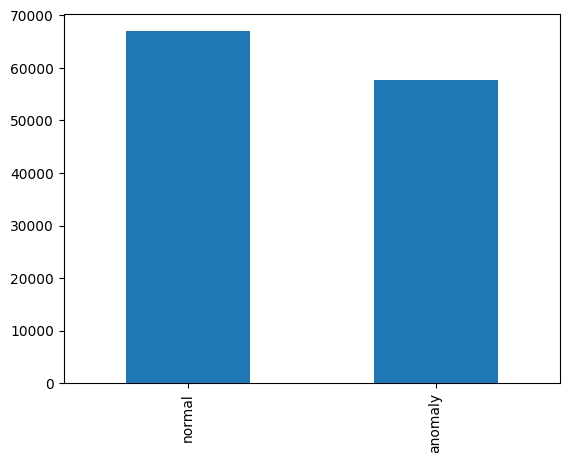

In [110]:
#viewing the count of normal and anomaly classes
df['class_num'] = df['class'].map({'normal':0, 'anomaly':1})
df['class'].value_counts().plot(kind='bar')

<Axes: xlabel='protocol_type', ylabel='count'>

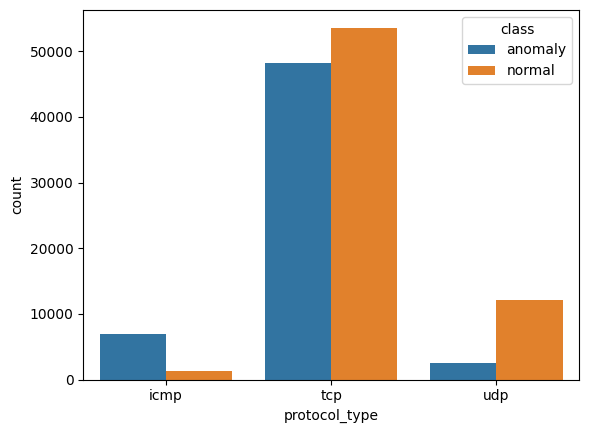

In [111]:
grouped_data = df.groupby(['protocol_type', 'class']).size().reset_index(name='count')
# create the bar plot using seaborn
sns.barplot(x='protocol_type', y='count', hue='class', data=grouped_data)

<Axes: xlabel='flag', ylabel='count'>

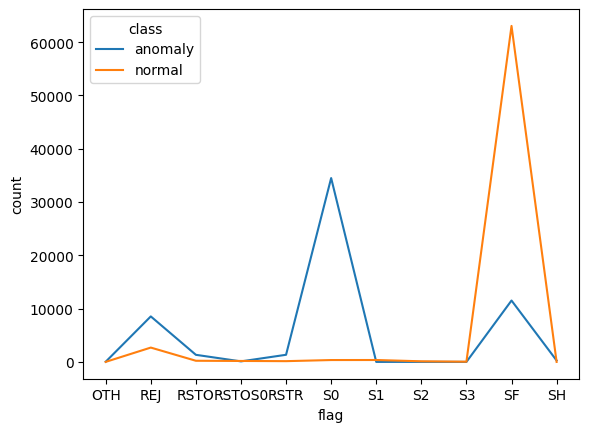

In [112]:
#flag
grouped_data = df.groupby(['flag', 'class']).size().reset_index(name='count')
sns.lineplot(x='flag', y='count', hue='class', data=grouped_data)

<Axes: xlabel='count', ylabel='service'>

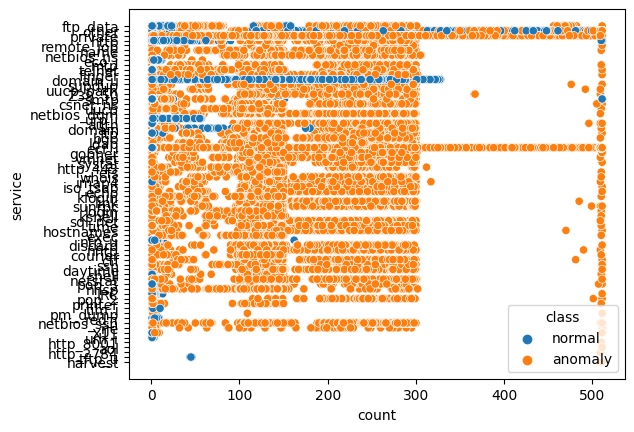

In [113]:
#service vs class
#grouped_data = df.groupby(['service', 'class']).size().reset_index(name='count')
# create the bar plot using seaborn
sns.scatterplot(x='count',y='service', hue='class', data=df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3224\1254106928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


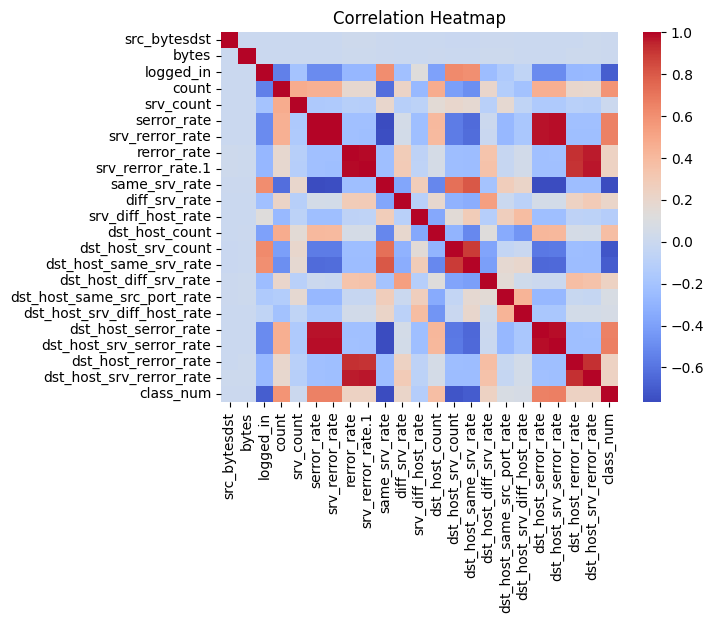

In [114]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()